In [24]:
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ashish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
import pandas as pd

In [26]:
df = pd.read_csv('../data/final_marathi_data.csv')
print(df.head())

                                            Sentence  Score
0  चा फक्त नारा देऊन उपयोग नाही महिला अत्याचाराच्...      1
1  पेट्रोल आणि डिझेलवर एक रूपया अधिभार लावल्याने ...     -1
2  लूट झूट का राज भागावो रोजगार और विकास लावो हा ...      1
3  महाराष्ट्र विकास आघाडी सरकारच्या मंत्रिमंडळ वि...      1
4  पिंपरीत अ‍ॅथलेटिक्स आणि विविध क्षेत्रांतल्या ख...      1


In [27]:
print(df.head())

                                            Sentence  Score
0  चा फक्त नारा देऊन उपयोग नाही महिला अत्याचाराच्...      1
1  पेट्रोल आणि डिझेलवर एक रूपया अधिभार लावल्याने ...     -1
2  लूट झूट का राज भागावो रोजगार और विकास लावो हा ...      1
3  महाराष्ट्र विकास आघाडी सरकारच्या मंत्रिमंडळ वि...      1
4  पिंपरीत अ‍ॅथलेटिक्स आणि विविध क्षेत्रांतल्या ख...      1


In [28]:
main_data = df["Sentence"].tolist()

<AxesSubplot: xlabel='Score', ylabel='count'>

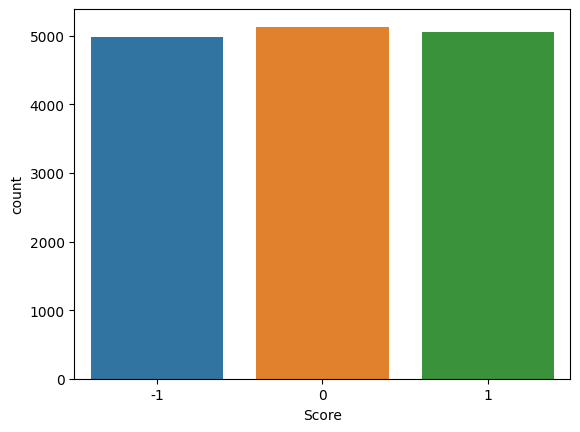

In [46]:
import seaborn as sns
sns.countplot(x='Score', data=df)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [30]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(main_data)

In [31]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, df['Score'], test_size=0.4, random_state=4)

In [32]:
LogReg = LogisticRegression().fit(X_train, y_train)
accuracy1 = LogReg.score(X_test, y_test)

c:\Users\Ashish\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
RandForest = RandomForestClassifier().fit(X_train, y_train)
accuracy2 = RandForest.score(X_test, y_test)

In [34]:
KNeighbors = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
accuracy3 = KNeighbors.score(X_test, y_test)

In [35]:
SupportVec = SVC().fit(X_train, y_train)
accuracy4 = SupportVec.score(X_test, y_test)

In [36]:
for i in range(1, 5):
    print("Accuracy {}: {}".format(i, eval("accuracy" + str(i))*100))

Accuracy 1: 69.6010550609957
Accuracy 2: 68.89218595450049
Accuracy 3: 45.07088691064952
Accuracy 4: 71.01879327398615


In [37]:
import re
import string

def clear_text(text):
    # List of all English characters and numbers
    eng_chars = string.ascii_letters + string.digits

    # List of all punctuation characters
    punc_chars = string.punctuation

    # Combine the two lists
    remove_chars = eng_chars + punc_chars

    # Remove all characters in the remove_chars list from the text
    text = ''.join(c for c in text if c not in remove_chars)

    text = re.sub(r'\s+', ' ', text).strip()

    return text

In [38]:
def sentiPrediction(input_data):
    input_data = clear_text(input_data)
    new_statement = vectorizer.transform([input_data])
    prediction = GBC.predict(new_statement)
    print("The final prediction for the new statement is:", prediction)


In [39]:
#sentiPrediction(input())

In [40]:
import pickle

In [41]:
# Saving the Logistic Regression model
with open('LogReg_marathi.pickle', 'wb') as handle:
    pickle.dump(LogReg, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the Random Forest model
with open('RandForest_marathi.pickle', 'wb') as handle:
    pickle.dump(RandForest, handle, protocol=pickle.HIGHEST_PROTOCOL)

# Saving the KNeighbors model
with open('KNeighbors_marathi.pickle', 'wb') as handle:
    pickle.dump(KNeighbors, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [42]:
# Saving the Support Vector Machine model
with open('SupportVec_marathi.pickle', 'wb') as handle:
    pickle.dump(SupportVec, handle, protocol=pickle.HIGHEST_PROTOCOL)



In [45]:
with open("vectorizer_marathi.pickle", "wb") as f:
    pickle.dump(vectorizer, f)